In [1]:
from gensim.models import Word2Vec

#define training data and train model
sentences = [['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec'], 
            ['this', 'is', 'the', 'second', 'sentence'], 
            ['yet', 'another', 'sentence'], 
            ['one', 'more', 'sentence'], 
            ['and', 'the', 'final', 'sentence']]
model = Word2Vec(sentences, min_count = 1)
print(model)

C:\Users\Saad\Anaconda3\lib\site-packages\gensim\utils.py:1212: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")
C:\Users\Saad\Anaconda3\lib\site-packages\gensim\models\base_any2vec.py:743: UserWarning: C extension not loaded, training will be slow. Install a C compiler and reinstall gensim for fast training.
  "C extension not loaded, training will be slow. "


Word2Vec(vocab=14, size=100, alpha=0.025)


In [2]:
#summarize vocabulary
words = list(model.wv.vocab)
print(words)

['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec', 'second', 'yet', 'another', 'one', 'more', 'and', 'final']


In [3]:
#access vector for one word
print(model['sentence'])

[-4.5337095e-03  2.7678460e-03  1.3272895e-03 -1.4005750e-03
 -2.8165686e-03 -3.4094634e-03  1.4058227e-03 -4.3604393e-03
  1.1740229e-03  8.8037748e-04  4.7316938e-03 -4.1131531e-03
 -3.5492566e-03 -1.6277940e-03  2.7272070e-04 -2.9891126e-03
  2.7298795e-03  4.6666381e-03 -4.9873842e-03  1.7480059e-03
 -2.6045269e-03 -4.4358149e-03  3.8702211e-03  1.7827452e-03
  3.4257590e-03  4.6446514e-03  4.5474502e-03 -3.3641502e-03
 -2.2305087e-05 -3.8712597e-04  2.4602767e-03 -2.3287495e-03
 -1.0012443e-03 -2.0207192e-03  4.6853931e-03 -2.0622388e-03
 -4.6851351e-03  4.2741053e-04 -3.1619193e-03 -2.6224521e-03
  1.4399101e-03  1.0221581e-03 -2.3853236e-03 -1.8626171e-03
  1.3016678e-03 -1.6423091e-03  4.2189769e-03  2.2912419e-03
 -3.4499741e-03 -4.8998399e-03 -4.0840795e-03 -4.2573237e-03
 -4.7730007e-03 -3.2559545e-03  1.6635867e-03 -4.5131883e-03
  2.1822827e-03 -3.3522572e-03 -2.5827661e-03  6.4265227e-04
 -1.4885339e-03 -9.9506334e-04  4.6353131e-03  1.8251939e-03
  2.4201639e-03 -9.21301

C:\Users\Saad\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [4]:
#save model
model.save('model.bin')

In [5]:
#load model
new_model =Word2Vec.load('model.bin')
print(new_model)

Word2Vec(vocab=14, size=100, alpha=0.025)


In [6]:
from sklearn.decomposition import PCA
from matplotlib import pyplot
#fit a 2d PCA model to the vectors

X = model[model.wv.vocab]
pca = PCA(n_components = 2)
result = pca.fit_transform(X)

C:\Users\Saad\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """


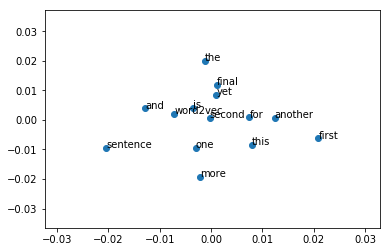

In [7]:
#create a scatter plot of the projection

pyplot.scatter(result[:, 0], result[:, 1])
for i, word in enumerate(words):
    pyplot.annotate(word, xy = (result[i, 0], result[i, 1]))
    
pyplot.show()

In [11]:
from gensim.models import KeyedVectors
filename = 'Datasets/GoogleNewsVector/GoogleNews-vectors-negative300.bin'
model_google = KeyedVectors.load_word2vec_format(filename, binary = True)

In [ ]:
#calculate: (king - man) + woman = ?

result_google = model_google.most_similar(positive = ['king', 'woman'], negative = ['man'], topn = 1)
print(result_google)